In [7]:
#Exercicio classificação vinhos
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
dados_vinhos = pd.DataFrame({
    'Teor Alcoolico':[3,4,5,6],
    'acidez': ['muito', 'pouco','medio', 'baixo'],
    'pH':[4.3,2.8,4.2,3.9]
})

In [9]:
#cria variavel dummies para transformar dados categoria em dados numericos
dados_vinhos = pd.get_dummies(dados_vinhos, columns=['acidez'])
dados_vinhos


,Teor Alcoolico,pH,acidez_baixo,acidez_medio,acidez_muito,acidez_pouco
0,3,4.3,False,False,True,False
1,4,2.8,False,False,False,True
2,5,4.2,False,True,False,False
3,6,3.9,True,False,False,False


In [10]:
#passo 4 aplicar o Kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(dados_vinhos)

c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [11]:
#passo 5 avaliar o desempenho do modelo K-means
sse = kmeans.inertia_
print("SSE: ", sse)

#passo 6 visualizando os resultados da sefmentação
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

SSE:  4.17


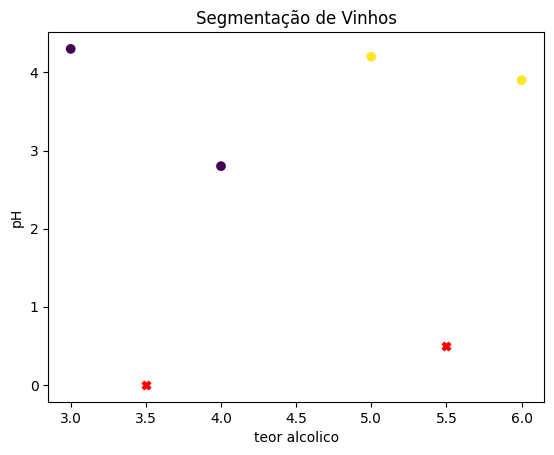

In [13]:
#plotando um grafico de dispersão dos vinhos com cores diferentes para cada grupo
plt.scatter(dados_vinhos['Teor Alcoolico'], dados_vinhos['pH'], c=labels)
plt.scatter(centroids[:,0], centroids[:,2], marker='X', color='red')
plt.xlabel('teor alcolico')
plt.ylabel('pH')
plt.title('Segmentação de Vinhos')
plt.show()

In [14]:
#passo 7 analisar os grupos resultantes
dados_vinhos['grupo'] = labels
grouped_data = dados_vinhos.groupby('grupo').mean()
print(grouped_data)

       Teor Alcoolico    pH  acidez_baixo  acidez_medio  acidez_muito  \
grupo                                                                   
0                 3.5  3.55           0.0           0.0           0.5   
1                 5.5  4.05           0.5           0.5           0.0   

       acidez_pouco  
grupo                
0               0.5  
1               0.0  
